# Bank Marketing
## Data cleaning

Dataset sources:  
https://www.kaggle.com/datasets/henriqueyamahata/bank-marketing

In [13]:
import numpy as np
import pandas as pd

pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb

In [3]:
#Read dataset
data_filepath = 'bank-additional-full.csv'
data = pd.read_csv(data_filepath, delimiter = ';', encoding = 'utf-8')

data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
data.shape

(41188, 21)

In [5]:
#Check variable types
data.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [6]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [7]:
#Check categorical variables values
for feature in data.columns :
    if data[feature].dtype == 'object' :
        print(f'"{feature}" values:', data[feature].unique(), sep = '\n', end = '\n\n')

"job" values:
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']

"marital" values:
['married' 'single' 'divorced' 'unknown']

"education" values:
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']

"default" values:
['no' 'unknown' 'yes']

"housing" values:
['no' 'yes' 'unknown']

"loan" values:
['no' 'yes' 'unknown']

"contact" values:
['telephone' 'cellular']

"month" values:
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']

"day_of_week" values:
['mon' 'tue' 'wed' 'thu' 'fri']

"poutcome" values:
['nonexistent' 'failure' 'success']

"y" values:
['no' 'yes']



In [8]:
#Check missing values

data.replace('unknown', np.nan, inplace = True)
data.replace('', np.nan, inplace = True)

missing_values_count = data.isna().sum()
missing_values_count

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

In [9]:
#Remove missing values
data.dropna(inplace = True)
print('Rows with missing values removed.')
print(data.shape)

Rows with missing values removed.
(30488, 21)


In [10]:
#Check duplicates
n_total_rows = data.shape[0]
n_duplicated_rows = data.loc[data.duplicated()].shape[0]
print('Number of duplicated rows:', n_duplicated_rows)

print('Percentage of duplicated rows:', round(n_duplicated_rows*100/n_total_rows, 2), '%')

Number of duplicated rows: 10
Percentage of duplicated rows: 0.03 %


In [11]:
#Remove duplicates
data.drop_duplicates(inplace = True)
print('Duplicated rows removed.')
print(data.shape)

Duplicated rows removed.
(30478, 21)


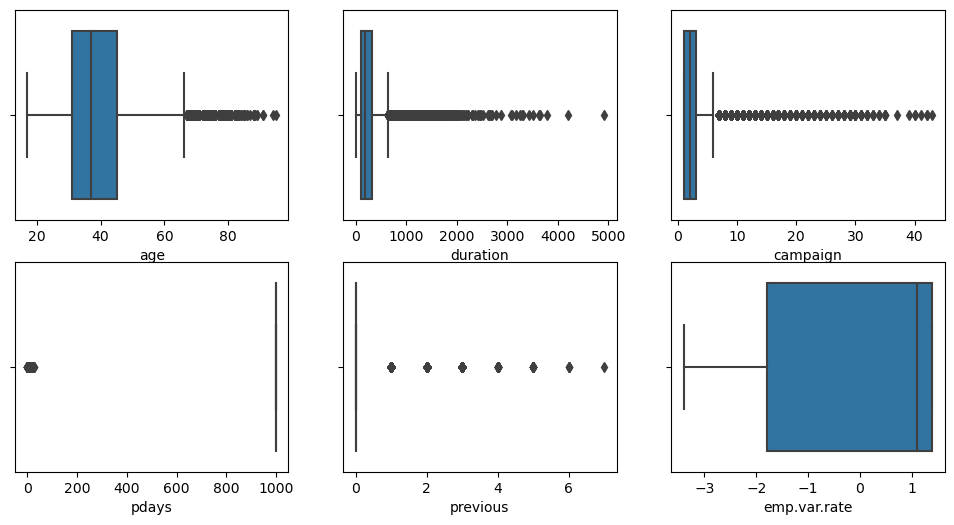

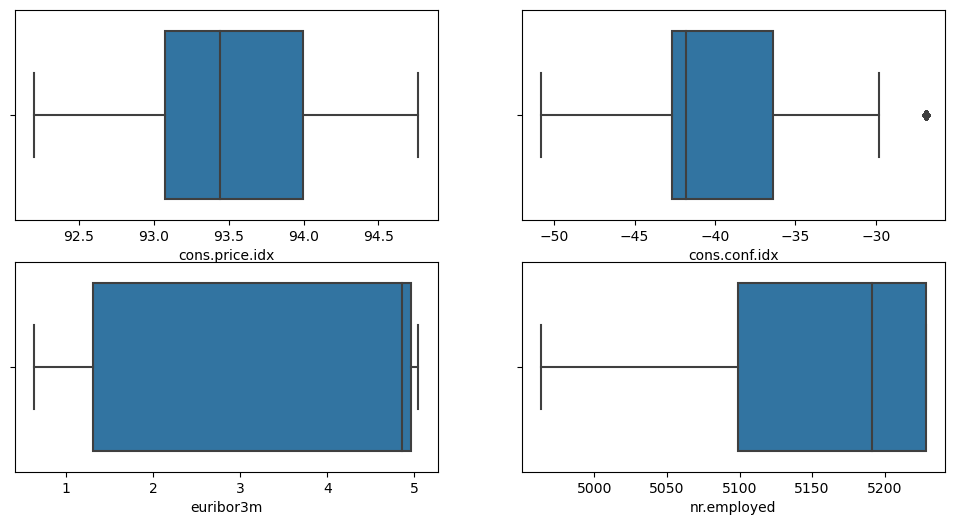

In [14]:
#Look for outliers
fg = plt.figure(figsize = (12, 6))
fg.add_subplot(231)
sb.boxplot(x = data.age)
fg.add_subplot(232)
sb.boxplot(x = data.duration)
fg.add_subplot(233)
sb.boxplot(x = data.campaign)
fg.add_subplot(234)
sb.boxplot(x = data.pdays)
fg.add_subplot(235)
sb.boxplot(x = data.previous)
fg.add_subplot(236)
sb.boxplot(x = data['emp.var.rate'])
plt.show()

fg = plt.figure(figsize = (12,6))
fg.add_subplot(221)
sb.boxplot(x = data['cons.price.idx'])
fg.add_subplot(222)
sb.boxplot(x = data['cons.conf.idx'])
fg.add_subplot(223)
sb.boxplot(x = data['euribor3m'])
fg.add_subplot(224)
sb.boxplot(x = data['nr.employed'])
plt.show()


In [15]:
#Check number of outliers for each variable (interquartile range method)

for feature in data.describe().columns :
    q25 = data.describe().loc['25%'][feature]
    q75 = data.describe().loc['75%'][feature]

    lower_boundary = q25 - 1.5*(q75 - q25)
    upper_boundary = q75 + 1.5*(q75 - q25)

    outliers_aux = data.query(f"`{feature}` < @lower_boundary or `{feature}` > @upper_boundary")
    print(f'# outliers for feature {feature}: {outliers_aux.shape[0]}')


# outliers for feature age: 457
# outliers for feature duration: 2174
# outliers for feature campaign: 1675
# outliers for feature pdays: 1310
# outliers for feature previous: 4652
# outliers for feature emp.var.rate: 0
# outliers for feature cons.price.idx: 0
# outliers for feature cons.conf.idx: 395
# outliers for feature euribor3m: 0
# outliers for feature nr.employed: 0


## Conclussions about the outliers

In general, extreme values (outliers) seem legitimate observations, not data entry errors.
However, it is not clear for 'campaign' values, because at first glance, 40 calls to the same customer for just one campaign seems too much, but on the other hand, campaign duration is not specified. If campaign lasts a whole year, 40 calls could be a plausible number. After these considerations, I have decided to also keep the outliers for this variable.

In [16]:
#Check 'previous' variable values
print(data.previous.unique())
print()
#Check 'pdays' variable values
print(data.pdays.unique())

[0 1 2 3 4 5 6 7]

[999   6   4   5   1   0   3  10   7   9  11   8   2  12  13  14  15  16
  21  17  18  22  25  26  19  27]


## About 'duration' feature:  
It represents last contact duration, in seconds (numeric). 

Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

In [17]:
#Check rows with 'duration' equals to 0 and output variable equals to 'yes'
data.loc[(data.duration == 0) & (data.y == 'yes')]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y


In [18]:
#Remove 'duration' column from dataframe
data.drop(columns = 'duration', inplace = True)

In [19]:
#Save cleaned dataset into a new csv file
data.to_csv('bank-marketing-cleandata.csv', index = False)